<pre><b>Author</b>: Ashlynn Wimer
<b>Date</b>: 3/4/2024
</pre>

This notebook attempts to verify the integrity of my labeling through a basic word counting approach.

In [2]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import wordcloud

In [2]:
BACKGROUND_COLOR = '#F0ECE2' # soft-white

In [3]:
corpus = pd.read_csv('../data/fully_labeled_data.csv', index_col='Unnamed: 0')

# Split corpus
trans_posts = corpus[corpus['transRelated'] == 1]
non_trans_posts = corpus.drop(trans_posts.index).reset_index()

We're going to use the clean content column for this, which should also save on compute power.

In [4]:
all_trans_posts = " ".join(trans_posts['clean_content'].tolist())
all_non_trans_posts = " ".join(non_trans_posts['clean_content'].apply(str).tolist())

Let's drop all punctuation, and assume words are separated if split by a space.

In [5]:
# remove punctuation, limit to one space, lowercase all
all_non_trans_posts = re.sub(r"[^\w\s']", ' ', all_non_trans_posts)
all_non_trans_posts = re.sub(r"'", '', all_non_trans_posts)
all_non_trans_posts = re.sub(r'\s+', ' ', all_non_trans_posts).lower()

all_trans_posts = re.sub(r"[^\w\s']", ' ', all_trans_posts)
all_trans_posts = re.sub(r"'", '', all_trans_posts)
all_trans_posts = re.sub(r'\s+', ' ', all_trans_posts).lower()

non_trans_posts_tokens = all_non_trans_posts.split(' ')
trans_posts_tokens = all_trans_posts.split(' ')

In [6]:
#nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))


trans_counts = {}
for word in trans_posts_tokens:
    if word not in stop_words:
        trans_counts[word] = trans_counts.get(word, 0) + 1

non_trans_counts = {}
for word in non_trans_posts_tokens:
    if word not in stop_words:
        non_trans_counts[word] = non_trans_counts.get(word, 0) + 1

# Used to generate a larger stop word list.
all_word_counts = {}
for word in (trans_posts_tokens + non_trans_posts_tokens):
    if word not in stop_words:
        all_word_counts[word] = all_word_counts.get(word, 0) + 1

trans_counts_t = sorted(trans_counts.items(), key=lambda x: x[1], reverse=True)
non_trans_counts_t = sorted(non_trans_counts.items(), key=lambda x: x[1], reverse=True)
all_word_counts_t = sorted(all_word_counts.items(), key=lambda x: x[1], reverse=True)


In [7]:
trans_counts['diy'], non_trans_counts['diy']

(338, 86)

Let's expand our stop word list by, within and across our samples, adding non-substantive but common words to it.

In [8]:
trans_counts_t[:50]

[('like', 19831),
 ('im', 12821),
 ('dont', 10989),
 ('people', 9964),
 ('trans', 9605),
 ('get', 8855),
 ('women', 8141),
 ('think', 7109),
 ('would', 7075),
 ('want', 6866),
 ('even', 6233),
 ('really', 5659),
 ('men', 5555),
 ('youre', 5245),
 ('know', 5153),
 ('one', 4918),
 ('cis', 4905),
 ('woman', 4821),
 ('look', 4775),
 ('feel', 4649),
 ('fuck', 4636),
 ('make', 4435),
 ('man', 4093),
 ('also', 4086),
 ('hrt', 3941),
 ('still', 3904),
 ('way', 3837),
 ('never', 3701),
 ('much', 3654),
 ('male', 3626),
 ('go', 3622),
 ('pass', 3622),
 ('good', 3612),
 ('thats', 3587),
 ('time', 3579),
 ('girl', 3396),
 ('need', 3028),
 ('cant', 2992),
 ('trannies', 2961),
 ('actually', 2949),
 ('shit', 2937),
 ('see', 2913),
 ('tranny', 2896),
 ('could', 2837),
 ('fucking', 2814),
 ('life', 2808),
 ('gay', 2759),
 ('ive', 2666),
 ('going', 2582),
 ('better', 2505)]

In [9]:
add_stop_word = [w for w, c in trans_counts_t[:3]]

In [10]:
non_trans_counts_t[:50]

[('like', 17678),
 ('im', 11553),
 ('dont', 9233),
 ('get', 7498),
 ('people', 6663),
 ('one', 6292),
 ('think', 6140),
 ('would', 6078),
 ('really', 5356),
 ('want', 5297),
 ('good', 4966),
 ('youre', 4911),
 ('know', 4742),
 ('even', 4422),
 ('thats', 3965),
 ('time', 3929),
 ('never', 3696),
 ('also', 3567),
 ('love', 3479),
 ('much', 3432),
 ('need', 3376),
 ('fuck', 3314),
 ('go', 3295),
 ('make', 3283),
 ('shit', 3263),
 ('fucking', 3032),
 ('cant', 2974),
 ('feel', 2894),
 ('look', 2889),
 ('see', 2872),
 ('lol', 2843),
 ('still', 2819),
 ('someone', 2818),
 ('life', 2751),
 ('got', 2742),
 ('way', 2729),
 ('ive', 2642),
 ('could', 2626),
 ('something', 2617),
 ('actually', 2614),
 ('sex', 2611),
 ('anon', 2610),
 ('going', 2599),
 ('right', 2541),
 ('yeah', 2539),
 ('gay', 2531),
 ('post', 2476),
 ('say', 2378),
 ('thing', 2377),
 ('bad', 2306)]

In [11]:
add_stop_word = add_stop_word + [w for w, c in non_trans_counts_t[:19]]

In [12]:
all_word_counts_t

[('like', 37509),
 ('im', 24374),
 ('dont', 20222),
 ('people', 16627),
 ('get', 16353),
 ('think', 13249),
 ('would', 13153),
 ('want', 12163),
 ('one', 11210),
 ('really', 11015),
 ('even', 10655),
 ('trans', 10295),
 ('youre', 10156),
 ('know', 9895),
 ('women', 9498),
 ('good', 8578),
 ('fuck', 7950),
 ('men', 7854),
 ('make', 7718),
 ('look', 7664),
 ('also', 7653),
 ('thats', 7552),
 ('feel', 7543),
 ('time', 7508),
 ('never', 7397),
 ('much', 7086),
 ('go', 6917),
 ('still', 6723),
 ('way', 6566),
 ('need', 6404),
 ('man', 6278),
 ('shit', 6200),
 ('cant', 5966),
 ('fucking', 5846),
 ('see', 5785),
 ('woman', 5748),
 ('actually', 5563),
 ('life', 5559),
 ('could', 5463),
 ('ive', 5308),
 ('gay', 5290),
 ('love', 5290),
 ('going', 5181),
 ('cis', 5166),
 ('something', 5098),
 ('someone', 4954),
 ('got', 4900),
 ('sex', 4868),
 ('right', 4861),
 ('thing', 4797),
 ('better', 4699),
 ('say', 4687),
 ('girl', 4648),
 ('yeah', 4501),
 ('bad', 4496),
 ('doesnt', 4466),
 ('post', 4411),

In [13]:
add_stop_word = add_stop_word + [w for w, c in all_word_counts_t[:11]]
stop_words = set(list(stop_words) + add_stop_word)

# For usage elsewhere
#with open('../data/stospwords.txt', 'w') as f:
#    f.write(str(list(stop_words)))

We want to get word clouds, but we need to make sure we actually filter out at least the basic stop words, so let's make a new token set.

In [14]:
trans_posts_tokens_sw = []
non_trans_posts_tokens_sw = []
all_posts_tokens_sw = []

for tkn in trans_posts_tokens:
    if tkn not in stop_words:
        trans_posts_tokens_sw.append(tkn)

for tkn in non_trans_posts_tokens:
    if tkn not in stop_words:
        non_trans_posts_tokens_sw.append(tkn)

for tkn in (trans_posts_tokens + non_trans_posts_tokens):
    if tkn not in stop_words:
        all_posts_tokens_sw.append(tkn)


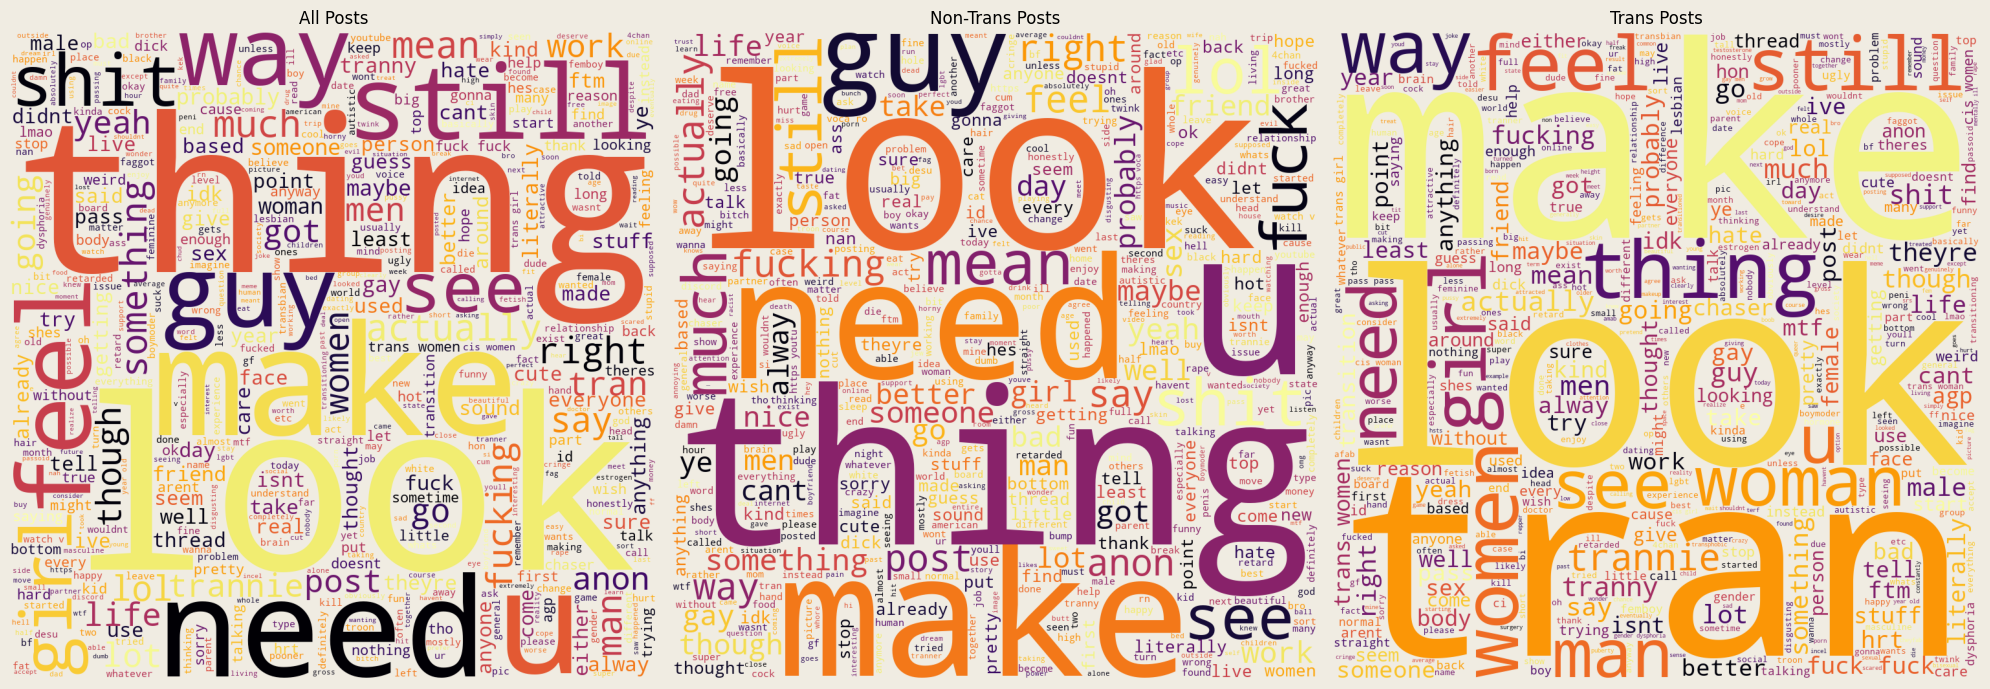

In [15]:
fig, axes = plt.subplots(ncols=3, figsize=(20,10))
fig.set_facecolor(BACKGROUND_COLOR)

wc = wordcloud.WordCloud(background_color=BACKGROUND_COLOR,
                    max_words=500, width=1000, height=1000,
                    mode='RGBA', colormap='inferno')\
                    .generate(' '.join(all_posts_tokens_sw))
axes[0].imshow(wc)
axes[0].set_title('All Posts')
axes[0].axis('off')

wc1 = wordcloud.WordCloud(background_color=BACKGROUND_COLOR,
                    max_words=500, width=1000, height=1000,
                    mode='RGBA', colormap='inferno')\
                    .generate(' '.join(non_trans_posts_tokens_sw))
axes[1].imshow(wc1)
axes[1].set_title('Non-Trans Posts')
axes[1].axis('off')

wc2 = wordcloud.WordCloud(background_color=BACKGROUND_COLOR,
                    max_words=500, width=1000, height=1000,
                    mode='RGBA', colormap='inferno')\
                    .generate(' '.join(trans_posts_tokens_sw))
axes[2].imshow(wc2)
axes[2].set_title('Trans Posts')
axes[2].axis('off')

plt.tight_layout()


This seems like evidence that our trans category is at least capturing _some_ aspect of transness, as it's word cloud is filled with trans words whereas our other wordclouds seem to be less trans related. 

Let's run a few other basic verification tests. In particular, our usage of non-fine-tuned chatgpt means that our pipeline may have missed trans related posts which used slang. We pick two slang terms common on 4chan but less common elsewhere for this: AGP, and IWNBAW. 

In [16]:
non_trans_counts['agp'], trans_counts['agp']

(339, 1461)

AGP is predominately in the trans_counts dataset, although any post with "AGP" in it is certainly a trans related post.

In [17]:
non_trans_counts['iwnbaw'], trans_counts['iwnbaw']

(17, 17)

Ooo, the plot thickens! We have many fewer trans tokens than non-trans tokens, so this is almost certainly a significant difference. On the other hand, it's also a sign that our model is slightly missing nuance.

While we're at it, let's get a fuller list of "iwn" words:

In [18]:
keys = set(list(non_trans_counts.keys()) + list(trans_counts.keys()))

iwn_tkns = set()
for key in keys:
    if 'iwn' in key:
        iwn_tkns.add(key)

iwn_tkns

{'6iwnbaw',
 'anonetteiwnbaw',
 'bumpiwnbaw',
 'factorsiwnbaw',
 'honiwn',
 'iwn',
 'iwnab',
 'iwnabwhat',
 'iwnb',
 'iwnba',
 'iwnbam',
 'iwnbarwim',
 'iwnbath',
 'iwnbaw',
 'iwnbawiwnbacwiwnbarwiwnbl',
 'iwnbawwhy',
 'iwndag',
 'iwnmi',
 'meiwn',
 'theoryiwnbaw',
 'tiwnhon',
 'tiwnk',
 'trannyiwn'}

This has proven to be a daily reminder that I need to figure out why I keep loses spaces between words. Regardless, it's interetsing to see that most of these are variations on "iwnbaw" or "iwnbab"; the term seems surprisingly homogenous!

Lastly, lets pull the above count comparisons into a quick and dirty table for the presentation tomorrow. In particular, let's check 'trans', 'chaser', 'hrt', 'agp', 'hsts', and 'iwnbaw'. 

In [19]:
words = ['trans' ,'hrt', 'agp', 'hsts', 'pooner', 'iwnbaw']
cnt_dicts = [all_word_counts, non_trans_counts, trans_counts]

counts = []
for cnt_dict in cnt_dicts:
    to_append = []
    for word in words:
        to_append.append(cnt_dict[word])
    counts.append(to_append)

pd.DataFrame(counts, columns=words, index=['All', 'Non-Trans', 'Trans'])

,trans,hrt,agp,hsts,pooner,iwnbaw
All,10295,4285,1800,576,541,34
Non-Trans,690,344,339,121,156,17
Trans,9605,3941,1461,455,385,17


In [20]:
words = ['trans' ,'hrt', 'agp', 'hsts', 'pooner', 'iwnbaw']
cnt_dicts = [all_word_counts, non_trans_counts, trans_counts]
token_totals = [len(non_trans_posts_tokens_sw + trans_posts_tokens_sw), len(non_trans_posts_tokens_sw), len(trans_posts_tokens_sw)]

counts = []
for cnt_dict, tkn_total in zip(cnt_dicts, token_totals):
    to_append = []
    for word in words:
        to_append.append(cnt_dict[word] / tkn_total)
    counts.append(to_append)

pd.DataFrame(counts, columns=words, index=['All', 'Non-Trans', 'Trans'])

,trans,hrt,agp,hsts,pooner,iwnbaw
All,0.004819,0.002006,0.000843,0.000270,0.000253,0.000016
Non-Trans,0.000665,0.000331,0.000326,0.000117,0.000150,0.000016
Trans,0.008747,0.003589,0.001331,0.000414,0.000351,0.000015


Okay, awesome! These tables support the idea that our classifier is doing fairly well, but probably missing some nuance on the edge.

Okay okay okay last check, I'm really curious:

In [21]:
all_word_counts['diy'], non_trans_counts['diy'], trans_counts['diy']

(424, 86, 338)

Interesting result discovered!!

Let's do one last test and see which threads have the most trans related posts.

In [16]:
print(corpus['subject'].value_counts()[:20] / len(non_trans_posts))

subject
/mtfg/ male to female general          0.034034
/gaygen/                               0.028249
/mtfg/ - Male to Female Genera(...)    0.022110
/lesgen/ - Lesbian General             0.017601
/mmg/ manmoder general                 0.009438
/mtfg/ - male to female genera(...)    0.008517
/mtfg/                                 0.008031
/gaygen/ Gay general                   0.006320
/fbg/ - Femboy General                 0.005925
chasergen                              0.005497
/bigen/ - Bisexual General             0.005497
/clg/ Cis Lesbian General              0.005233
/repgen/ - repressor general           0.005110
/wcg/ - Webcomics General              0.004740
/mtfg/ - Allison Reynolds Fanc(...)    0.004542
/mtfg/ 女らしい general                    0.004427
/mtfg/ - Bri'ish """""Food""""(...)    0.004402
/passgen/                              0.004386
/mtfg/ meds that feel good             0.004123
34511563                               0.004106
Name: count, dtype: float64


In [17]:
print(trans_posts['subject'].value_counts()[:20] / len(trans_posts))

subject
/mtfg/ male to female general          0.012392
/mtfg/ - Male to Female Genera(...)    0.009704
/lesgen/ - Lesbian General             0.009476
/mmg/ manmoder general                 0.007639
/repgen/ - repressor general           0.005361
/fbg/ - Femboy General                 0.005148
/agpgen/ - don’t let the threa(...)    0.004222
/mtfg/                                 0.004116
/passgen/                              0.003964
34610116                               0.003569
/mtfg/ - male to female genera(...)    0.003417
/gaygen/                               0.003402
/hrtgen/ - HRT General - #642          0.003204
/frengen/                              0.002961
/clg/ Cis Lesbian General              0.002916
/bigen/ - Bisexual General             0.002885
/bmg/ - boymoder general | [in(...)    0.002870
/hrtgen/ - HRT General - #638 (...)    0.002794
/frengen/ - menhera edition            0.002764
/repgen/ - valentine's day edi(...)    0.002734
Name: count, dtype: float64


In [43]:
print(non_trans_posts['subject'].value_counts()[:20] / len(non_trans_posts))

subject
/mtfg/ male to female general          0.027319
/gaygen/                               0.026406
/mtfg/ - Male to Female Genera(...)    0.016852
/lesgen/ - Lesbian General             0.012466
/mtfg/ - male to female genera(...)    0.006665
/gaygen/ Gay general                   0.005851
/mtfg/                                 0.005801
/mmg/ manmoder general                 0.005299
chasergen                              0.004682
/wcg/ - Webcomics General              0.004369
/bigen/ - Bisexual General             0.003933
/mtfg/ - Allison Reynolds Fanc(...)    0.003703
/clg/ Cis Lesbian General              0.003654
/mtfg/ 女らしい general                    0.003563
34511563                               0.003555
/mtfg/- male to o female gener(...)    0.003423
/chasergen/ problems edition           0.003226
/fbg/ - Femboy General                 0.003135
/Chasergen/ - Dance Edition            0.003036
/mtfg/ meds that feel good             0.002995
Name: count, dtype: float64


/mtfg/, /mtfg/, /mmg/, /repgen/, /fbg/, /agpgen/, and /mtfg/ all make sense! /lesgen/ _could_ be concerning, but isn't too concerning as many trans women are also lesbians (and hence would be expected to frequent that half of the board) 

I have time for more analysis, let's check a few co-word occurrances. We expect:

1. DIY near HRT or HRT related terms
2. discord.gg

In [29]:
import nltk

trans_nltk_chan = nltk.Text(trans_posts_tokens)

index = nltk.text.ConcordanceIndex(trans_nltk_chan)
index.print_concordance('diy', width=120)

Displaying 25 of 338 matches:
rlabs se blood tests by mail https www letsgetchecked com diy capillary blood samples expensive lab test guide https ww
a low dose will i masculinize on this will be able to get diy cypro hopefully by the end of this month or sooner but fo
 pre t why would it suddenly start now i plan on starting diy in a bit and was planning to go with monotherapy injectio
hese things i dont know how they would react if i started diy and that scares me beyond belief i dont know if im trans 
er starting on high dose to flex on doctors https txti es diy hrt guideis this a good regimen to avoid tube tits i thin
mely self conscious about every single part of my body go diy enanthate injections bicalutamide or decapeptyl and youll
hristcucks exist a bit yeah any determine hons would just diy but tons of people would desist or there would be a harde
feel even more fucked up when i think about being able to diy when i was 15 if i wasn t retarded i m sorry it s skewed 
 of surger

In [24]:
trans_nltk_chan.collocations()

trans women; look like; feel like; cis women; dont know; trans people;
dont want; dont think; gender dysphoria; year old; mentally ill; https
www; liar liar; rentry org; trans girls; https rentry; years ago;
youtube com; cis woman; www youtube


Okay, while I really need to fix my data cleaning, these website links are getting interesting. Let's do some counting:

In [4]:
trans_posts.urls.unique()

trans_posts['urlsNew'] = trans_posts.content.apply(lambda x: re.findall(r'https:\/\/\w*.\w*', x))

import numpy as np
url, cts = np.unique(np.sum(trans_posts['urlsNew'].values), return_counts=True)

df = pd.DataFrame({'urls':url, 'cts':cts})
df.sort_values('cts', ascending=False)[:50]

C:\Users\wimer\AppData\Local\Temp\ipykernel_42552\4057648698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_posts['urlsNew'] = trans_posts.content.apply(lambda x: re.findall(r'https:\/\/\w*.\w*', x))


,urls,cts
94,https://rentry.org,193
235,https://www.youtube,163
135,https://voca.ro,111
241,https://youtu.be,81
128,https://unsee cc,62
84,https://pastebin.com,30
137,https://vocaroo.com,29
11,https://archiveofsins.com,27
0,https://1drv.ms,24
20,https://discord.gg,24


In [57]:
url = 'https://archiveofsins.com'
trans_posts[[url in posts for posts in trans_posts['urlsNew'].values]].content.tolist()

[">>34516023this person appears to've tried to befriend a minor on this board moments agohttps://archiveofsins.com/lgbt/thread/34521875/>>femcel tranny looking for friends>17yo mentally unstable transgirl>i live in a mental facility and am only home on the weekends currently>im not a complete loser but i used to be, there are still remnants of it>im lonelyhttps://archiveofsins.com/lgbt/thread/34521875/#34521927>I'm mychemicalromanceisawesome>Add me NOW!maybe someone else just dropped this person's tag to troll them. so take this as you will",
 ">>34550124don't leave her for a foiddon't realize partway into commitment that you can't do anal only after alldon't realize partway into commitment that you aren't okay with her dick after alldon't find her dick to be a compromise (unless she has dysphoria that dictates she would prefer as much, in which case you might have to expect her to get bottom surgery)it's too much text to quote, but i saw a horror story linked here once of a guy who on

In [82]:
trans_posts[['https://ia802804.us' in posts for posts in trans_posts['urlsNew'].values]].content.tolist()

['>qott: What period of history would you like to live as a woman in? Aesthetically, not for the human rights. >AGP questions and answers>Thoughts and feelings / emotions>Help, advice, guidance>Be cozy and chill out>What is AGP?Autogynephilia, from Greek αὐτό- ("self"), γυνή ("woman") and φιλία ("love")Broadly, arousal to the thought of being a woman. It can take many forms - being aroused at imagining or seeing yourself with a female body, dressing in clothes that make you appear feminine, acting in stereotypical "feminine" ways, or others.>Isn\'t AGP just discredited pseudoscience?No, you might be thinking of Blanchard\'s Typology, which includes the idea of AGP. Regardless of whether or not you agree with Blanchard\'s ideas, AGP is very real to the people who experience it.>I\'m AGP, does this mean I\'m not trans?No, you can be AGP and trans.>Aren\'t you all just trannies in denial?Some people with AGP will go on to transition, while others are content with incorporating it into the

In [84]:
trans_posts[['https://soundcloud.com' in posts for posts in trans_posts['urlsNew'].values]].content.tolist()

[">>34677286https://soundcloud.com/june-striderand she's cute",
 '>>34677286>definitely mtf, no questionarca (surprised only 1 mention itt): https://soundcloud.com/arca1000000/arca-nonbinarygl0wrm: https://www.youtube.com/watch?v=s12GmQb9734nosgov: https://soundcloud.com/820/deletesenses: https://soundcloud.com/icy-9-productions/senses-x-nosgov-game-overemorave: https://soundcloud.com/2emo/gateswagtastic: https://soundcloud.com/humpherous/bean-w-swag-sedaku-9uziskid trash: https://soundcloud.com/kidtrashpop/musictriedtoplaymeprobably tons more im missing, half of soundcloud is mtf or gnc>probably mtf, insufficient data for meaningful answerfolie (also frax/gupi and rest of dogwhatever records): https://soundcloud.com/notfolie/clean2-feat-bean-boylunaa: https://soundcloud.com/lunaa1/lunaa-voi-crashemotegi: https://soundcloud.com/emotegi/under-my-skin-prod-glxyi9bonsai: https://soundcloud.com/gray4k/i9bonsai-way2much-prod-dr-gray4k-x-noahmejiah-x-rioleyvaxoxoswitch: https://soundcloud.co

In [86]:
url = 'https://1drv.ms'	
trans_posts[[url in posts for posts in trans_posts['urlsNew'].values]].content.tolist()

['Previous thread: >>34492825• Help, advice, guidance on meds and dosages• HRT related medical experiences and research• Availability and pricing of medications• Rational and scientific discussionSee following post for a pharmacy list.Survey: https://1drv.ms/xs/s!AudRJceTA5C9c2G5lCV2Avq0kQ0▶ Survey data: https://1drv.ms/x/s!AudRJceTA5C9cyIWo6_X14AvHyM▶ HRTGen Data Analysis: https://1drv.ms/f/s!AudRJceTA5C9gRLLWnbpdzlIxe4r▶ HRT Info Sheets: https://1drv.ms/f/s!AudRJceTA5C9gQnyM7wxZcBGWRzW▶ Pill ID: https://www.drugs.com/imprints.php▶ DrugBank: https://www.drugbank.com/▶ Basic HRT: https://apps.carleton.edu/campus/gsc/assets/hormones_MTF.pdf▶ HRT ranges: http://www.hemingways.org/GIDinfo/hrt_ref.htm▶ Powers Method: https://powersfamilymedicine.com/s/Healthcare-of-the-Transgender-Patient-V60.pptx▶ Endocrine Society Guidelines: https://academic.oup.com/jcem/article/102/11/3869/4157558▶ Transline Guidelines (with bicalutamide): https://transline.zendesk.com/hc/en-us/article_attachments/3600

In [87]:
url = 'https://voca.ro'	
trans_posts[[url in posts for posts in trans_posts['urlsNew'].values]].content.tolist()

[">>34542128https://voca.ro/1gvxlGutMQu5In a bath right now, but what do u guys think of my voice? I feel as though it's like not passable at all but I'm unable to be objective about my own voice ofc",
 'https://voca.ro/1arvc5bF3m6N ok rating others>>34542149pass and i feel like we have the same vocal phenotype lol>>34542338u sound fine and a bit nerdy>>34542371not a bad start! discernibly feminine, but i think better resonance will clear you>>34542377the joker??>>34542623passes but you sound nervous>>34542819your voice mostly passes, buh sounds a bit froggy. you also sound like you’re on something, or tired?',
 '>>34542819https://voca.ro/19mZghJBvmWC>>34542863https://voca.ro/1fDmgvMCmchW',
 '>>34542128https://voca.ro/1e1lVBJ2SWjp ftm here. i think i need to work on my enunciations or something. i feel uncanny',
 '>>34549177https://voca.ro/1kyXKhecMt4z',
 '>>34553256ok fine Faggot.no sultry voice tho fuck you, just normal speaking voicehttps://voca.ro/1eOMnj0eZgwk',
 '>>34564425https:/

In [5]:
url = 'https://www.youtube'
trans_posts[[url in posts for posts in trans_posts['urlsNew'].values]].content.tolist()

['>>34501475can i still post here after i start taking the pills? i like repkings more than trannies>>34501899https://www.youtube.com/watch?v=Z96I_LEGdGQ',
 'https://www.youtube.com/watch?v=zPUL1F0v2cM>I have found a treatment plan for dysphoria, it involves getting married and having kids and going to work>I didn\'t throw away my pills I still have them in a box over there, I\'ll throw them away when I\'ve gone three years without taking them"scale of 1 to 10 how much do you regret the gender treatment?">six, I regret it but it\'s not horrific regret >I\'ve detransitioned because I realized that it wasn\'t a cure>I haven\'t swam since I was 14, my body hair always bothered me, facial hair growing, I never was comfortable with my gendered aspectsshe also denied being agp yet again despite her entire life being literal textbook agp progression and said her solution for dysphoria is to start a family as a way to repress her tranny desires',
 "evening bigen !https://www.youtube.com/watch?

In [6]:
url = 'https://twitter.com'
trans_posts[[url in posts for posts in trans_posts['urlsNew'].values]].content.tolist()

['>>34548225https://twitter.com/hirari12/status/1732059315819966769https://pbs.twimg.com/media/GAl8XTlbkAAcIWj?format=jpg&name=orighttps://pbs.twimg.com/media/GAl8XacbgAE3CWt?format=jpg&name=origit\'s too late; you are already the "after" version of a hentai girl in my eyes',
 '>>34534303someone i follow put your post on my timelinehttps://twitter.com/boymoderology/status/1754237214937039272',
 '>>34572048https://twitter.com/RealiaAmelia/status/1754593219566776598>the bangs, the glasses, the computer programming. she’s the prototype.Fucking weird cause you find this type of women everywhere these days',
 '>>34588277For me it was about how my sexuality often makes me feel more like a beast than a woman. And thinking back on it, every time i have horrible emotions and the need to lash out it triggers dysphoria and anxiety in me, because im not acting womanly enough, in my head.She captured it wellhttps://twitter.com/REALISHangel/status/1754970943901114534?t=YGeAgXC0_gODUyYTemT4ow&s=19',


In [49]:
urls = ['https://voca.ro', 'https://vocaroo.com']
mentions_vocaro = [urls[0] in posts for posts in trans_posts['urlsNew'].values]
mentions_vocaroo = [urls[1] in posts for posts in trans_posts['urlsNew'].values]
mentions_vocaroo = [(a or b) for a,b in zip(mentions_vocaro, mentions_vocaroo)]

anon_mentions_vocaroo = trans_posts[(trans_posts['author'] == 'Anonymous') & mentions_vocaroo]
anon = trans_posts[trans_posts['author'] == 'Anonymous']
nonanon_mentions_vocaroo = trans_posts[(trans_posts['author'] != 'Anonymous') & mentions_vocaroo]
nonanon = trans_posts['author'] != 'Anonymous'

anon_rate = len(anon_mentions_vocaroo) / len(anon)
nonanon_rate = len(nonanon_mentions_vocaroo) / len(nonanon)

anon_rate / nonanon_rate


C:\Users\wimer\AppData\Local\Temp\ipykernel_42552\3131291627.py:6: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  anon_mentions_vocaroo = trans_posts[(trans_posts['author'] == 'Anonymous') & mentions_vocaroo]
C:\Users\wimer\AppData\Local\Temp\ipykernel_42552\3131291627.py:8: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  nonanon_mentions_vocaroo = trans_posts[(trans_posts['author'] != 'Anonymous') & mentions_vocaroo]


8.212836995106974

In [53]:
url = 'https://unsee cc'
trans_posts[[url in posts for posts in trans_posts['urlsNew'].values]].content.tolist()

["can any of you give tips on makeup?I'm a manboymoder & am not wearing it out, just practicing for later. I think I improved since the past (dont practice enough)but I did:e.l.f poreless putty, elf live ivory concealer under eyes, elf halo glow setting powder (light pink) on concealer, Missha BB Boomer mixed w/ Missha no.21 BB cream. setting powder again, LANEIGE Lip Glowy Balm, eyelash curler + innisfree skinny microcara zero (brown) mascarahttps://unsee cc/album#oheynHl9qUEubrown shirt is no makeup for referenceI'm trying to go for a more natural kind of look that isn't totally noticeable but enhanced",
 "sorry to ask for this. but I'm trying to practice makeup (no I dont wear it out, also, try & ignore shadow cause I am having laser done which will be gone before I even attempt to girlmode)how obvious is this on a scale of 1 - 10? and also, what parts can improve a lot ?what I did:>e.l.f poreless putty >elf live ivory concealer under eyes>elf halo glow setting powder (light pink) o

In [55]:
url = 'https://discord.gg'
trans_posts[[url in posts for posts in trans_posts['urlsNew'].values]].content.tolist()

['>>34548699there’s a server for people like us,come and become one of the mtf to ftm based boys; https://discord.gg/fEdsUhrV',
 '>>34571767yesss you get the vibe. my transition goal is to be ftm. i am the tranny joker ..>>34573169we have a whole server of amab pooners in the making :)https://discord.gg/fyPJEeSq',
 '>MOVIE NIGHTMOVIE NIGHT>MOVIE NIGHTMOVIE NIGHTA reminder that tomorrow at 22 GMT we will vote for the next two movies for Movie Night! If you want you can also give your recommendation by replying to this post>what the hell is "movie night"its a special night where bigen comes together to watch on Discord two movies chosen by the community>when will movie night take place?its FRIDAY at 23 gmt>where do we watch the movies?on the Bigen Movie and Game Night Discord server:https://discord.gg/sVWAPQFk>i don\'t usually post on bigen/never took part in movie night, can i join?of course, movie night is open to anyone, just remember to be civil and have fun!fyi: this is the list of 

... I _really_ need to fix my data cleaning. 

On the other hand: "trans women", "cis women", "trans people", and "gender dysphoria" are all good signs that this is a relevant category. Additionally, "look like" and "feel like" are theoretically interesting, but let's put a pin in that for now.

In [62]:
non_trans_nltk_chan = nltk.Text(non_trans_posts_tokens)

nt_index = nltk.text.ConcordanceIndex(non_trans_nltk_chan)

nt_index.print_concordance('diy')

Displaying 25 of 86 matches:
 times how about us anons every other diy site has fucked me in bristol uk they
 an avid cook and gardener skilled in diy and repair of mechanical and electron
ummer im going to off myself or maybe diy still havent decided and probably won
e i havent got bloods done in 3 years diy is op lmao noi havent had my bloods d
aspectsprettyscale hugboxxes too just diy then and tell them to go fuck themsel
ven bothered with a psychiatrist just diy just exercise and eat ass surgery has
tax fraudwhat im transmed but support diy i also think that if doctors were mis
 insurance right now i get why people diy but it also seems a bit like continui
l room all night i finally ordered my diy hrt should i do my first injection on
 to this sorry is there any way i can diy ts i dont wanna talk to a doctor you 
ns to removing entire internal organs diy uterus removal tutorial when that s o
 risk ive been blissfully ignorant on diy for 3 years now aaaa img onan dieaaa 
e maid for 

This is definitely less laser-focused on DIY HRT than the alternative, although it is sitll a reflection of less than perfect classification (e.g., diy utuerus removal, diy orchiectomy, etc are all trans related by the codebook).

# A More Sensible Approach

My original verification approach was to use word clouds and word counting to show that my two corpuses were different and that my classifier was working correctly. While successful, an arguably better approach is to find distinctive words for my corpuses using pointwise mutual information, and then to compare the lists. If our classifier is working correctly then we ought have trans-related keywords in the distinctive word lists.

Recall that the pointwise mutual information of a token $w$ in a class $c$ is

$$P(w, c) = \log\frac{\mathbb{P}(w, c)}{\mathbb{P}(w)\mathbb{P}(c)}$$

where $\mathbb{P}(w,c)$ is the probability that the token appears in a post from class $c$, $\mathbb{P}(w)$ is the probability the token appears in any post in our universe, and $\mathbb{P}(c)$ is the probability a given post from our universe is in class $c$. 

In [73]:
# Minimum number of appearances a token needs to make in all three of our subsets to be considered.
MINIMUM_APPEARANCES = 10

token_post_counts_all = {}
token_post_counts_non_trans = {}
token_post_counts_trans = {}

token_prob = {}

import math

In [74]:
# We start by finding the probabilities that tokens appear in any given post

# Count num posts each token appears in for our entire corpus
for i, post in corpus.iterrows():
    
    # tokenize the post
    tokenized = re.sub(r"[^\w\s']", ' ', str(post['clean_content']))
    tokenized = re.sub(r"'", '', tokenized)
    tokenized = re.sub(r'\s+', ' ', tokenized).lower()
    tokenized = tokenized.split(' ')

    # For tokens in post:
    for token in set(tokenized):
        if token == '': continue

        token_post_counts_all[token] = token_post_counts_all.get(token, 0) + 1

        if post['transRelated'] == 1:
            token_post_counts_trans[token] = token_post_counts_trans.get(token, 0) + 1
        else:
            token_post_counts_non_trans[token] = token_post_counts_non_trans.get(token, 0) + 1

# Convert to probabilities
# We use a bit of laplace smoothing
for token in token_post_counts_all.keys():

    # ignore rare tokens
    is_rare_token = token_post_counts_all.get(token, 0) < MINIMUM_APPEARANCES or\
                    token_post_counts_non_trans.get(token, 0) < MINIMUM_APPEARANCES or\
                    token_post_counts_trans.get(token, 0) < MINIMUM_APPEARANCES

    if is_rare_token: continue

    global_prob = token_post_counts_all.get(token, 1) / len(corpus)
    trans_prob = token_post_counts_trans.get(token, 1) / len(trans_posts)
    non_trans_prob = token_post_counts_non_trans.get(token, 1) / len(non_trans_posts)

    token_prob[token] = {'global': global_prob, 'trans':trans_prob, 'non_trans':non_trans_prob}

In [75]:
# Calculate PMIs
trans_pmis = {}
non_trans_pmis = {}

prob_post_transRelated = len(trans_posts) / len(corpus)
prob_post_not_transRelated = len(non_trans_posts) / len(corpus)

for token, probs in token_prob.items():
    trans_pmi = math.log(probs['trans'] / (probs['global'] * prob_post_transRelated))
    non_trans_pmi = math.log(probs['non_trans'] / (probs['global'] * prob_post_not_transRelated))

    trans_pmis[token] = trans_pmi
    non_trans_pmis[token] = non_trans_pmi    


In [76]:
sorted(trans_pmis.items(), key=lambda x: x[1], reverse=True)[:25]

[('cis', 2.0320403482186578),
 ('girlmode', 2.022097295073075),
 ('trans', 2.008911834065921),
 ('binary', 2.007826782628191),
 ('puberty', 2.0057589797474127),
 ('stealth', 2.001797031538708),
 ('passing', 2.001426585633605),
 ('dysphoric', 1.9967804339154716),
 ('hrt', 1.9952811192550208),
 ('femininity', 1.990784231703306),
 ('clocked', 1.9888716474447543),
 ('cypro', 1.988341565269607),
 ('androgynous', 1.987046731474817),
 ('blockers', 1.983116502997653),
 ('nonbinary', 1.980774437212135),
 ('hormones', 1.9791162339095976),
 ('hormone', 1.978806067805001),
 ('gaydens', 1.9764564717200506),
 ('transitioning', 1.9740198893087284),
 ('transition', 1.9732212534507152),
 ('mtfs', 1.970365700682862),
 ('cisf', 1.969918669410051),
 ('dysphoria', 1.9686721283994943),
 ('afab', 1.9673601648679573),
 ('babytrans', 1.9636924299949527)]

In [77]:
sorted(non_trans_pmis.items(), key=lambda x: x[1], reverse=True)[:25]

[('baku', 0.7885643285998539),
 ('gaygen', 0.7864178386928903),
 ('goodnight', 0.7534730087885839),
 ('maiq', 0.7495406403708628),
 ('youtu', 0.7425719710547694),
 ('song', 0.7368739499401318),
 ('cheese', 0.7358978639670763),
 ('venus', 0.7324195995907515),
 ('bump', 0.7237531996583536),
 ('poop', 0.7220568125552049),
 ('accent', 0.7164192582443102),
 ('butthole', 0.7085588184638447),
 ('si', 0.7083220480116911),
 ('bless', 0.70015873737253),
 ('kat', 0.6886169769323585),
 ('cuddles', 0.6869027607662886),
 ('soup', 0.6836294354213195),
 ('snake', 0.6771569209157019),
 ('favourite', 0.6728848961383422),
 ('heroin', 0.6692406979692199),
 ('frfr', 0.668591558056779),
 ('guitar', 0.6668223171049381),
 ('sauce', 0.6652802967531228),
 ('rain', 0.6652802967531228),
 ('desk', 0.6623520369740347)]